In [1]:
#I start by importing pandas, numpy modules

In [2]:
import pandas as pd
import numpy as np

In [3]:
# I load the tsv file
df = pd.read_csv('toxicity_annotated_comments_unanimous.tsv', header=0, sep="\t")

In [4]:
# display the first few rows
df.tail()
df.head()

,rev_id,comment,year,logged_in,ns,sample,split
0,527004.0,NEWLINE_TOKENNEWLINE_TOKENNEWLINE_TOKENNEWLINE...,2002,True,user,random,test
1,603474.0,`:Here I cannot answer your questions. I did ...,2003,True,article,random,train
2,808576.0,"NEWLINE_TOKENNEWLINE_TOKENIn fact, I've just d...",2003,True,user,random,dev
3,986363.0,16:13 1 Jun 2003 (UTC),2003,True,article,random,train
4,1433843.0,NEWLINE_TOKENNEWLINE_TOKEN:I replied on .,2003,True,user,random,train


In [5]:
# remove text that keeps appearing again but does not influence toxicity score
df['comment'] = df['comment'].str.replace('NEWLINE_TOKEN', ' ')
df['comment'] = df['comment'].str.replace('TAB_TOKEN',' ')
df['comment'] = df['comment'].str.replace('Wikipedia',' ')
df['comment'] = df['comment'].str.replace('UTC',' ')
df['comment'] = df['comment'].str.replace('wikipedia',' ')

In [6]:
df.head()

,rev_id,comment,year,logged_in,ns,sample,split
0,527004.0,Is something like Managing_Urban_America g...,2002,True,user,random,test
1,603474.0,`:Here I cannot answer your questions. I did ...,2003,True,article,random,train
2,808576.0,"In fact, I've just done it for you.",2003,True,user,random,dev
3,986363.0,16:13 1 Jun 2003 ( ),2003,True,article,random,train
4,1433843.0,:I replied on .,2003,True,user,random,train


In [7]:
# Above file does not have toxicity score. Below I open file with toxicity score
df2 = pd.read_csv('toxicity_annotations_unanimous.tsv', header = 0, sep = "\t")

In [8]:
df2.head(11)

,rev_id,worker_id,toxicity,toxicity_score
0,527004.0,3802,0,0.0
1,527004.0,3942,0,0.0
2,527004.0,590,0,0.0
3,527004.0,481,0,0.0
4,527004.0,3944,0,0.0
5,527004.0,4172,0,0.0
6,527004.0,2419,0,0.0
7,527004.0,3323,0,0.0
8,527004.0,2851,0,0.0
9,527004.0,4175,0,0.0


In [9]:
# There are 10 scores for each comment. Below I group toxicity scores by rev_id
uniqueScores = df2[["rev_id", "toxicity_score"]].groupby("rev_id", as_index=False).first()

In [10]:
uniqueScores.head(11)

,rev_id,toxicity_score
0,527004.0,0.0
1,603474.0,0.0
2,808576.0,0.0
3,986363.0,0.0
4,1433843.0,0.0
5,1988528.0,0.0
6,1988988.0,0.0
7,2078042.0,0.0
8,2747887.0,0.0
9,2850252.0,0.0


In [11]:
# Merge the 2 DataFrames

mergedData = pd.merge(df, uniqueScores, on="rev_id")

In [12]:
mergedData.head()

,rev_id,comment,year,logged_in,ns,sample,split,toxicity_score
0,527004.0,Is something like Managing_Urban_America g...,2002,True,user,random,test,0.0
1,603474.0,`:Here I cannot answer your questions. I did ...,2003,True,article,random,train,0.0
2,808576.0,"In fact, I've just done it for you.",2003,True,user,random,dev,0.0
3,986363.0,16:13 1 Jun 2003 ( ),2003,True,article,random,train,0.0
4,1433843.0,:I replied on .,2003,True,user,random,train,0.0


In [13]:
# lowercase everything in comment column
mergedData.comment = mergedData.comment.str.lower()
mergedData.head()

,rev_id,comment,year,logged_in,ns,sample,split,toxicity_score
0,527004.0,is something like managing_urban_america g...,2002,True,user,random,test,0.0
1,603474.0,`:here i cannot answer your questions. i did ...,2003,True,article,random,train,0.0
2,808576.0,"in fact, i've just done it for you.",2003,True,user,random,dev,0.0
3,986363.0,16:13 1 jun 2003 ( ),2003,True,article,random,train,0.0
4,1433843.0,:i replied on .,2003,True,user,random,train,0.0


In [14]:
# More cleanup. Remove all months using a dictionary
replacements = {
    'utc': '', 'jan': '', 'feb': '','mar': '','apr':'','may':'', 'jun':'', 'jul':'', 'aug':'', 'sep':'',
    'oct':'', 'nov':'', 'dec':'', 'january':'','february':'','march':'','april':'','may':'','june':'',
    'july':'','august':'','september':'','october':'','november':'', 'december':''
}
mergedData['comment'].replace(replacements, regex=True, inplace = True)
mergedData.head(10)

,rev_id,comment,year,logged_in,ns,sample,split,toxicity_score
0,527004.0,is something like managing_urban_america g...,2002,True,user,random,test,0.0
1,603474.0,`:here i cannot answer your questions. i did ...,2003,True,article,random,train,0.0
2,808576.0,"in fact, i've just done it for you.",2003,True,user,random,dev,0.0
3,986363.0,16:13 1 2003 ( ),2003,True,article,random,train,0.0
4,1433843.0,:i replied on .,2003,True,user,random,train,0.0
5,1988528.0,ha ah aha hahahahhahahahhahah,2003,False,user,random,train,0.0
6,1988988.0,request from hi tim - is your page at s...,2003,True,user,random,train,0.0
7,2078042.0,i unprotected - assuming accidental/old v...,2003,True,user,random,train,0.0
8,2747887.0,"oh - well - if you put it that way, all i ca...",2004,True,user,random,test,0.0
9,2850252.0,hi i really appreciate that someone does ...,2004,True,user,random,test,0.0


In [15]:
# Include only alpha characters

import re

mergedData.comment = mergedData.comment.apply(lambda x: re.sub('[^a-zA-Z\s]', '', x))
mergedData.head(10)

,rev_id,comment,year,logged_in,ns,sample,split,toxicity_score
0,527004.0,is something like managingurbanamerica goi...,2002,True,user,random,test,0.0
1,603474.0,here i cannot answer your questions i did not...,2003,True,article,random,train,0.0
2,808576.0,in fact ive just done it for you,2003,True,user,random,dev,0.0
3,986363.0,,2003,True,article,random,train,0.0
4,1433843.0,i replied on,2003,True,user,random,train,0.0
5,1988528.0,ha ah aha hahahahhahahahhahah,2003,False,user,random,train,0.0
6,1988988.0,request from hi tim is your page at st...,2003,True,user,random,train,0.0
7,2078042.0,i unprotected assuming accidentalold van...,2003,True,user,random,train,0.0
8,2747887.0,oh well if you put it that way all i can s...,2004,True,user,random,test,0.0
9,2850252.0,hi i really appreciate that someone does ...,2004,True,user,random,test,0.0


In [16]:
# Add comment length column

mergedData['length'] = df.comment.apply(lambda x: len(x))
mergedData.head()

,rev_id,comment,year,logged_in,ns,sample,split,toxicity_score,length
0,527004.0,is something like managingurbanamerica goi...,2002,True,user,random,test,0.0,91
1,603474.0,here i cannot answer your questions i did not...,2003,True,article,random,train,0.0,406
2,808576.0,in fact ive just done it for you,2003,True,user,random,dev,0.0,38
3,986363.0,,2003,True,article,random,train,0.0,23
4,1433843.0,i replied on,2003,True,user,random,train,0.0,19


In [17]:
# Get statistics
mergedData.describe()

,rev_id,year,toxicity_score,length
count,3.582000e+03,3582.000000,3582.000000,3582.000000
mean,3.251383e+08,2009.564489,0.011446,123.652708
std,2.015736e+08,2.970703,0.346737,330.155149
min,5.270040e+05,2001.000000,-2.000000,5.000000
25%,1.531170e+08,2007.000000,0.000000,31.000000
50%,3.064077e+08,2009.000000,0.000000,45.000000
75%,4.960040e+08,2012.000000,0.000000,89.000000
max,6.996604e+08,2016.000000,1.000000,5000.000000


In [18]:
# Print out row with comment length = 450

mergedData.loc[mergedData['length'] == 450]

,rev_id,comment,year,logged_in,ns,sample,split,toxicity_score,length
6,1988988.0,request from hi tim is your page at st...,2003,True,user,random,train,0.0,450
347,56835865.0,thank you for experimenting with the page am...,2006,True,user,random,train,1.0,450


In [21]:
mergedData.get_value(347, 'comment')

'  thank you for experimenting with the page amazon river on   your test worked and has been reverted or removed please use the sandbox for any other tests you want to do take a look at the welcome page if you would like to learn more about contributing to our encyclopedia thank you for your understanding  a link to the edit i have reverted can be found here link if you believe this edit should not have been reverted please contact me   '

In [23]:
mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3582 entries, 0 to 3581
Data columns (total 9 columns):
rev_id            3582 non-null float64
comment           3582 non-null object
year              3582 non-null int64
logged_in         3582 non-null bool
ns                3582 non-null object
sample            3582 non-null object
split             3582 non-null object
toxicity_score    3582 non-null float64
length            3582 non-null int64
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 415.4+ KB


In [24]:
# I could not deduce any meaningful correlations between columns
mergedData[['length', 'year', 'toxicity_score', 'rev_id']].corr(method='pearson')

,length,year,toxicity_score,rev_id
length,1.000000,-0.028690,0.034047,-0.031738
year,-0.028690,1.000000,-0.013052,0.991147
toxicity_score,0.034047,-0.013052,1.000000,-0.016787
rev_id,-0.031738,0.991147,-0.016787,1.000000


In [39]:
# Use NLTK to extract words from text
# Import RegexpTokenizer from nltk.tokenize
import nltk
from nltk.tokenize import RegexpTokenizer

# Create tokenizer. 
# '\w+' will match any alphanumeric A-z, a-z, 0-9, along with underscores
tokenizer = RegexpTokenizer('\w+')


In [40]:
comment = mergedData.loc[:, "comment"]

In [41]:
# Create a list of all comments
all_words = []
for word in comment:
    all_words.append(word)
print(all_words[:4])
magama = str(all_words)
#print(magama)

['    is something like managingurbanamerica going to be a problem       ', 'here i cannot answer your questions  i did not write the above it was in the original article but towards the bottom  given the organization of the article such as it is i thought this kind of information belonged earlier so i moved it up  i do recall biologists using the word locus when refering to alleles so i didnt question the choice of words  but as i say i did not write this  ', '  in fact ive just done it for you ', '        ']


In [42]:
# Create tokens. magama has to be a string
tokens = tokenizer.tokenize(magama)
tokens[:10]

['is',
 'something',
 'like',
 'managingurbanamerica',
 'going',
 'to',
 'be',
 'a',
 'problem',
 'here']

In [43]:
# Initialize new list
words = []

# Loop through list tokens and make lower case

for word in tokens:
    words.append(word.lower())

# Print several items from list as sanity check

words[:10]

['is',
 'something',
 'like',
 'managingurbanamerica',
 'going',
 'to',
 'be',
 'a',
 'problem',
 'here']

In [44]:
# Do sanity check and get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('english')
sw[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers']

In [45]:
# Initialize new list
words_ns = []


# Add to words_ns all words that are in words but not in sw

for word in words:
    if word not in sw:
        words_ns.append(word.lower())


# Print several list items as sanity check
words_ns[:10]

['something',
 'like',
 'managingurbanamerica',
 'going',
 'problem',
 'cannot',
 'answer',
 'questions',
 'write',
 'original']

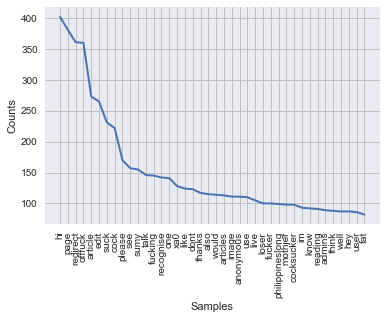

In [48]:
#Import datavisualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


# Figures inline and set visualization style
%matplotlib inline
sns.set()


# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(40)